Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/fjcreate/'

N = 40_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}9/fork_join_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}9/fork_join_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}9/fork_join_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}9/fork_join_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 22 11:22:43 2025 +0200) (509.36ms ela...,5.970,0.0319,0.593,6.90,1.14,98.48,49.61 C,Nominal
1,(Tue Apr 22 11:22:43 2025 +0200) (506.27ms ela...,1.650,0.0833,0.731,2.44,0.46,37.56,49.61 C,Nominal
2,(Tue Apr 22 11:22:44 2025 +0200) (510.41ms ela...,0.301,0.0413,0.428,0.85,0.21,14.98,49.18 C,Nominal
3,(Tue Apr 22 11:22:44 2025 +0200) (509.00ms ela...,1.150,0.0420,0.477,1.81,0.42,32.05,49.18 C,Nominal
4,(Tue Apr 22 11:22:45 2025 +0200) (508.65ms ela...,0.282,0.0353,0.433,0.83,0.21,14.25,48.77 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(15064, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 22 11:22:55 2025 +0200) (1007.13ms el...,38.5,0.0689,1.53,40.74,3.94,99.53,52.98 C,Nominal
1,(Tue Apr 22 11:22:56 2025 +0200) (1005.16ms el...,36.7,0.0666,1.43,40.48,3.80,97.52,56.43 C,Nominal
2,(Tue Apr 22 11:22:57 2025 +0200) (1005.94ms el...,34.1,0.0663,1.34,37.63,3.61,96.51,58.93 C,Nominal
3,(Tue Apr 22 11:22:58 2025 +0200) (1005.67ms el...,33.3,0.0808,1.55,37.07,3.67,96.40,61.08 C,Nominal
4,(Tue Apr 22 11:22:59 2025 +0200) (1005.24ms el...,35.5,0.0562,1.47,39.08,3.67,96.96,63.29 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 22 10:02:22 2025 +0200) (510.77ms ela...,0.236,0.0000,0.267,0.36,0.06,4.73,41.67 C,Nominal
1,(Tue Apr 22 10:02:23 2025 +0200) (508.18ms ela...,0.909,0.0350,0.361,1.15,0.20,15.81,41.96 C,Nominal
2,(Tue Apr 22 10:02:23 2025 +0200) (507.47ms ela...,0.399,0.0000,0.277,0.54,0.09,6.84,41.96 C,Nominal
3,(Tue Apr 22 10:02:24 2025 +0200) (509.25ms ela...,1.780,0.0244,0.428,2.07,0.34,22.99,42.02 C,Nominal
4,(Tue Apr 22 10:02:24 2025 +0200) (509.13ms ela...,4.220,0.0000,0.388,4.64,0.84,73.36,42.02 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(4003, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 22 10:02:34 2025 +0200) (1009.84ms el...,17.6,0.012900,0.935,18.44,2.13,96.18,41.91 C,Nominal
1,(Tue Apr 22 10:02:35 2025 +0200) (1006.33ms el...,19.1,0.002850,0.946,19.93,2.28,96.44,44.04 C,Nominal
2,(Tue Apr 22 10:02:36 2025 +0200) (1006.50ms el...,18.8,0.033000,1.080,19.71,2.23,95.93,47.06 C,Nominal
3,(Tue Apr 22 10:02:37 2025 +0200) (1006.42ms el...,17.0,0.000303,0.864,17.79,2.01,96.22,49.21 C,Nominal
4,(Tue Apr 22 10:02:38 2025 +0200) (1006.41ms el...,16.2,0.001150,0.825,16.99,1.95,95.91,49.91 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-22 11:22:43,5.970,0.0319,0.593,6.90,1.14,98.48,49.61,Nominal,509.36
1,2025-04-22 11:22:43,1.650,0.0833,0.731,2.44,0.46,37.56,49.61,Nominal,506.27
2,2025-04-22 11:22:44,0.301,0.0413,0.428,0.85,0.21,14.98,49.18,Nominal,510.41
3,2025-04-22 11:22:44,1.150,0.0420,0.477,1.81,0.42,32.05,49.18,Nominal,509.00
4,2025-04-22 11:22:45,0.282,0.0353,0.433,0.83,0.21,14.25,48.77,Nominal,508.65


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(15064, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-22 11:22:55,38.5,0.0689,1.53,40.74,3.94,99.53,52.98,Nominal,1007.13
1,2025-04-22 11:22:56,36.7,0.0666,1.43,40.48,3.80,97.52,56.43,Nominal,1005.16
2,2025-04-22 11:22:57,34.1,0.0663,1.34,37.63,3.61,96.51,58.93,Nominal,1005.94
3,2025-04-22 11:22:58,33.3,0.0808,1.55,37.07,3.67,96.40,61.08,Nominal,1005.67
4,2025-04-22 11:22:59,35.5,0.0562,1.47,39.08,3.67,96.96,63.29,Nominal,1005.24


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-22 10:02:22,0.236,0.0000,0.267,0.36,0.06,4.73,41.67,Nominal,510.77
1,2025-04-22 10:02:23,0.909,0.0350,0.361,1.15,0.20,15.81,41.96,Nominal,508.18
2,2025-04-22 10:02:23,0.399,0.0000,0.277,0.54,0.09,6.84,41.96,Nominal,507.47
3,2025-04-22 10:02:24,1.780,0.0244,0.428,2.07,0.34,22.99,42.02,Nominal,509.25
4,2025-04-22 10:02:24,4.220,0.0000,0.388,4.64,0.84,73.36,42.02,Nominal,509.13


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(4003, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-22 10:02:34,17.6,0.012900,0.935,18.44,2.13,96.18,41.91,Nominal,1009.84
1,2025-04-22 10:02:35,19.1,0.002850,0.946,19.93,2.28,96.44,44.04,Nominal,1006.33
2,2025-04-22 10:02:36,18.8,0.033000,1.080,19.71,2.23,95.93,47.06,Nominal,1006.50
3,2025-04-22 10:02:37,17.0,0.000303,0.864,17.79,2.01,96.22,49.21,Nominal,1006.42
4,2025-04-22 10:02:38,16.2,0.001150,0.825,16.99,1.95,95.91,49.91,Nominal,1006.41


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


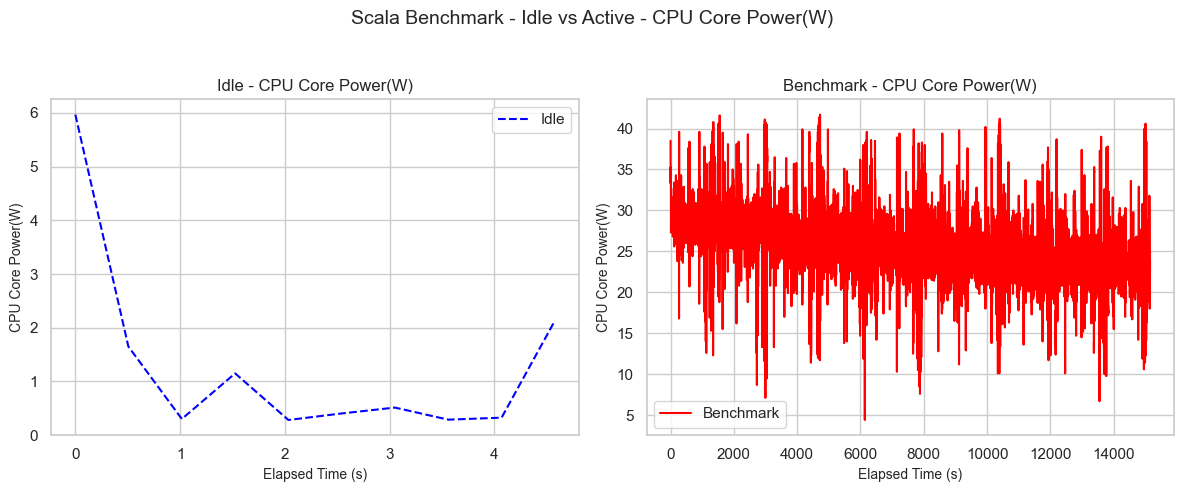

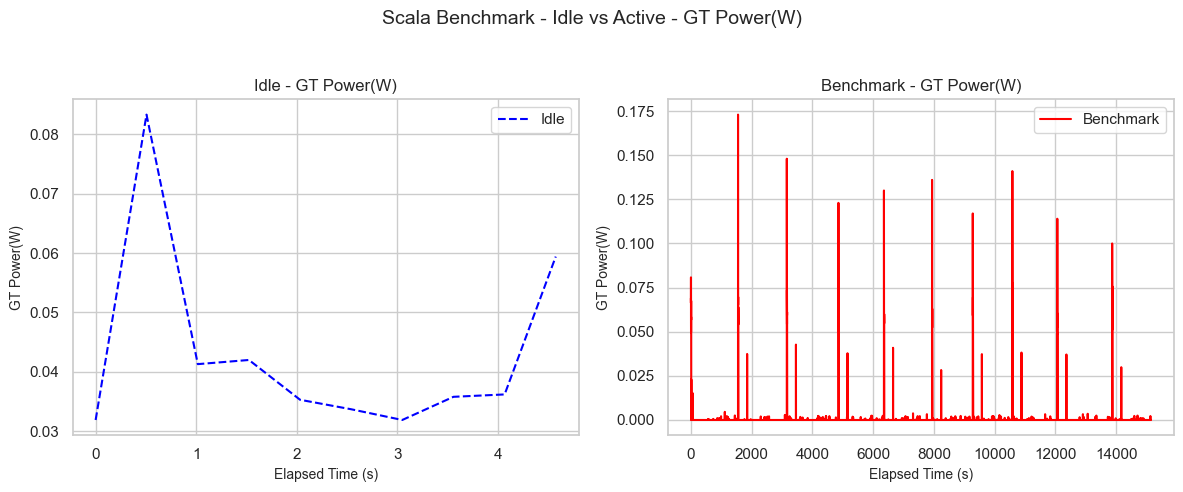

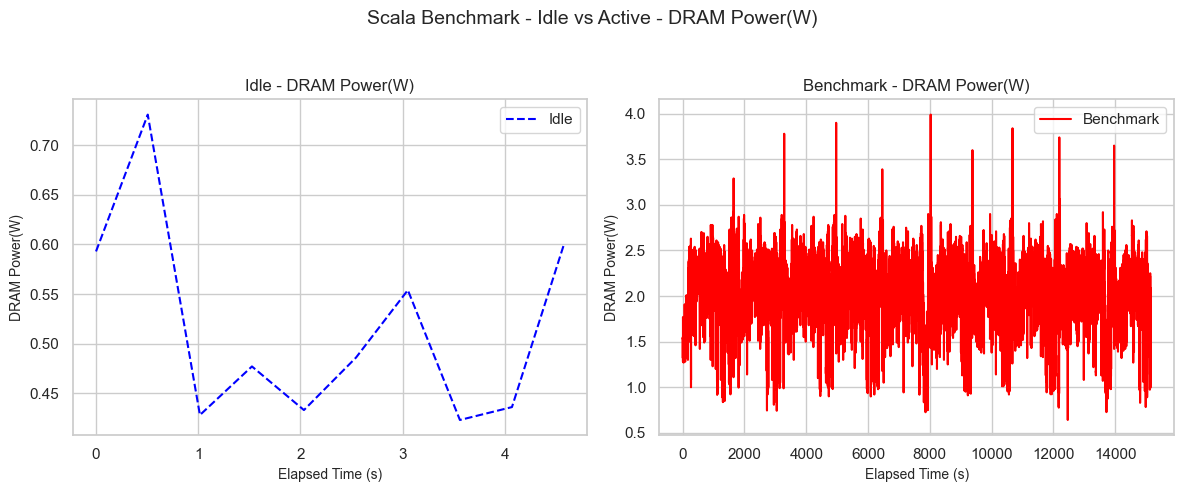

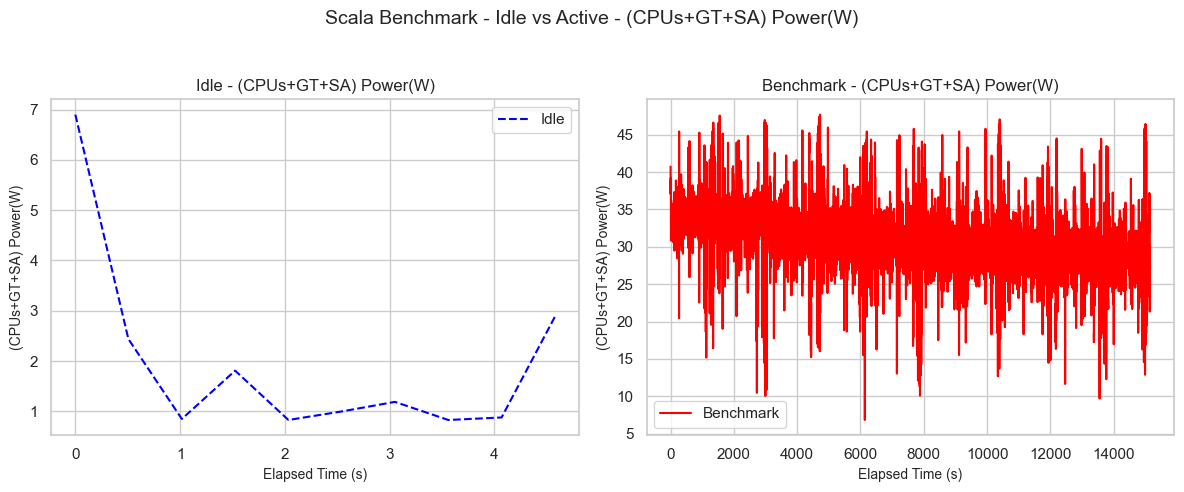

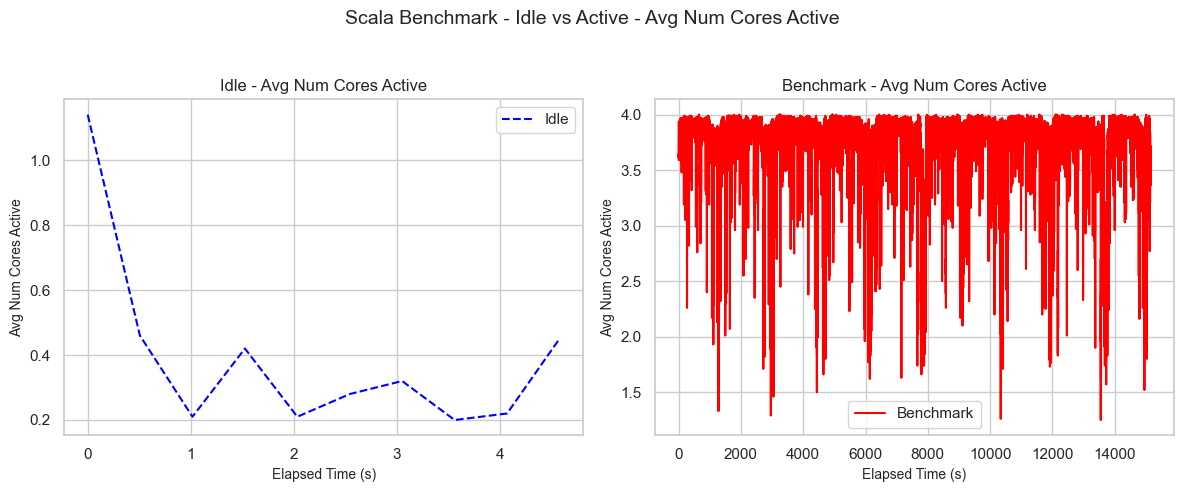

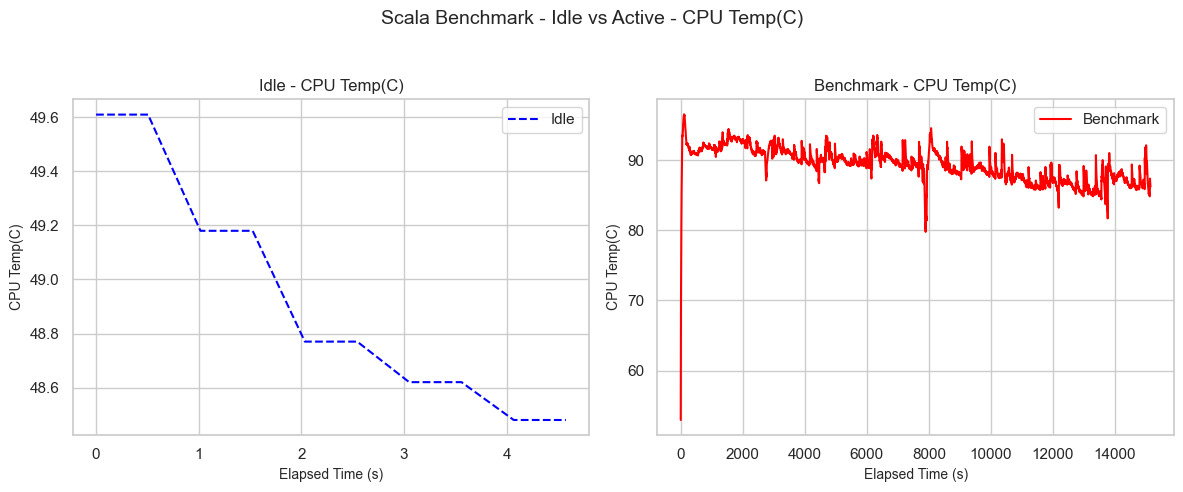

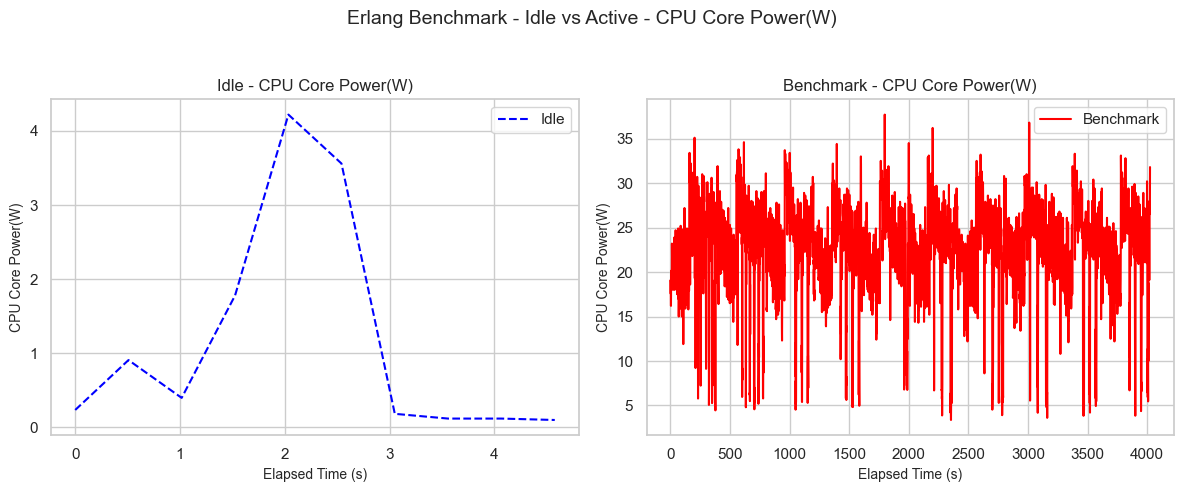

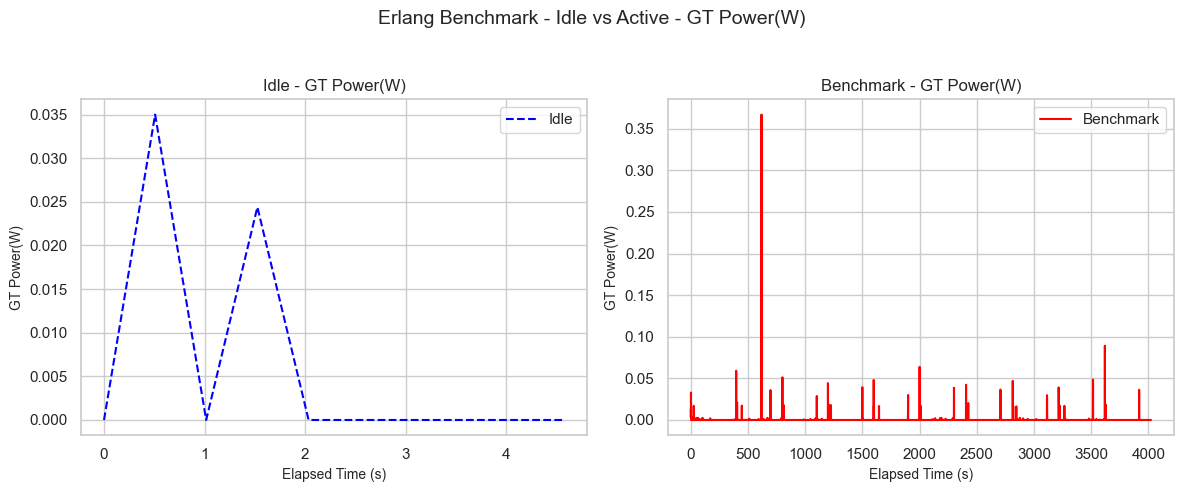

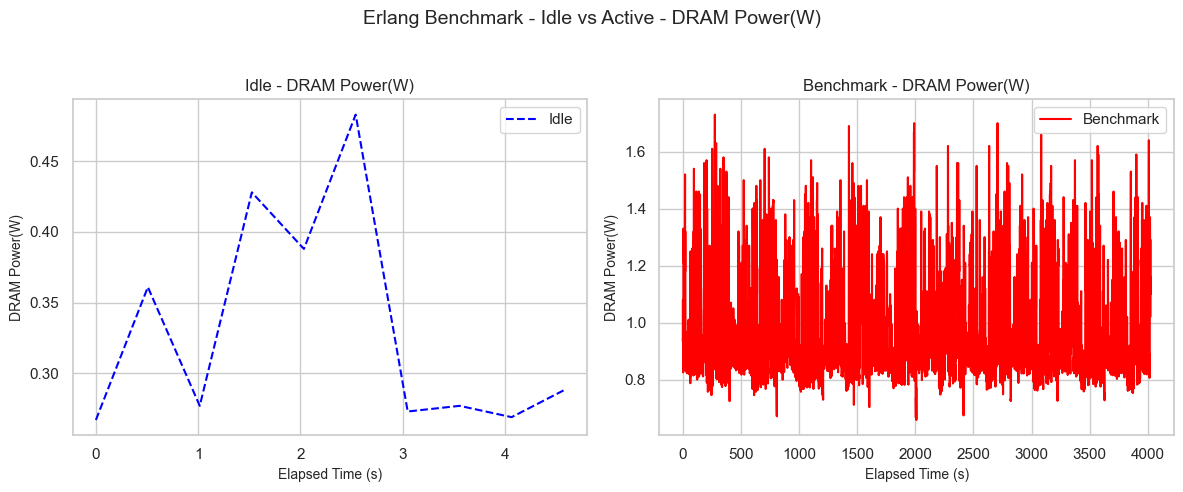

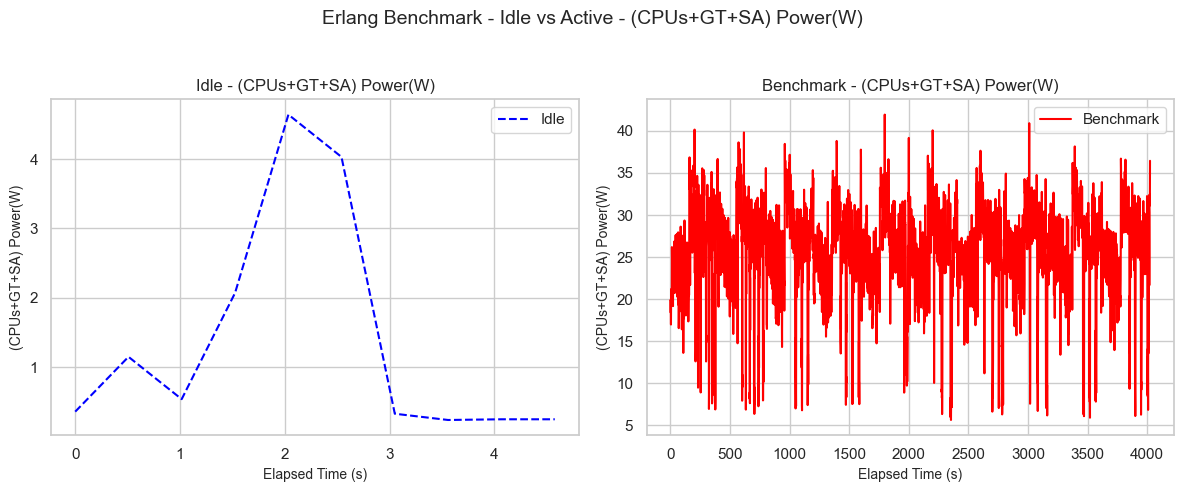

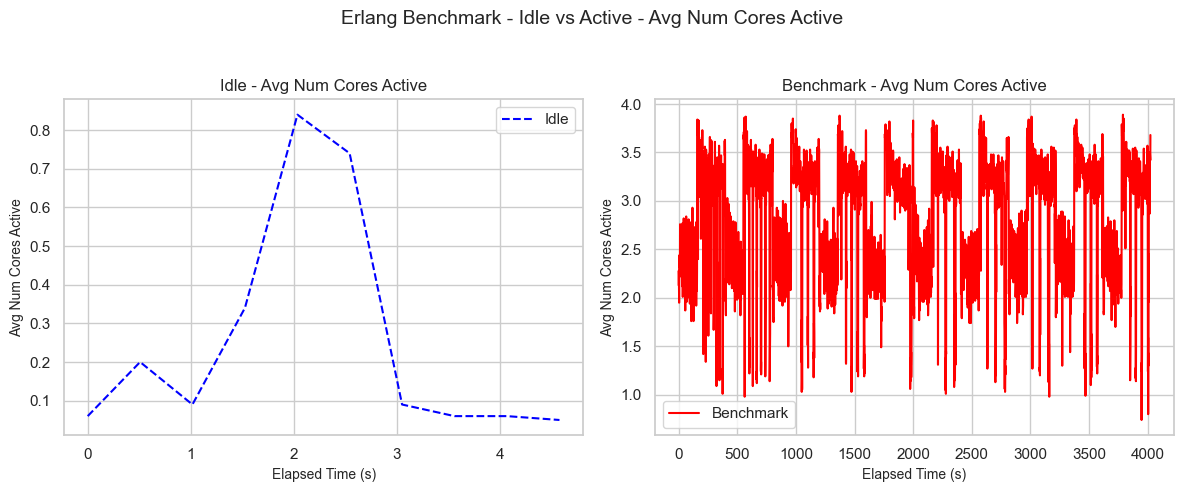

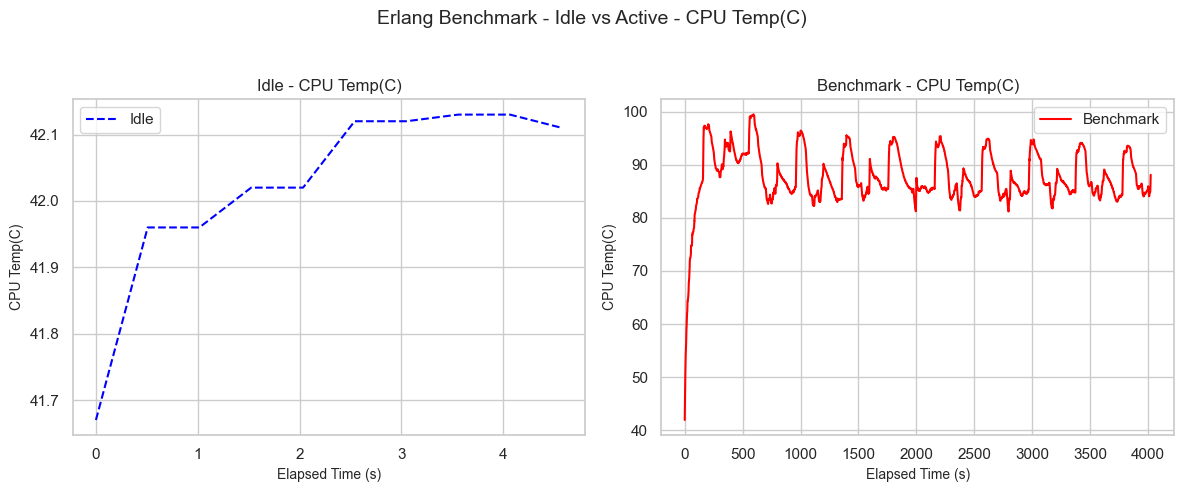

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

message_label = format_message_count(N)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

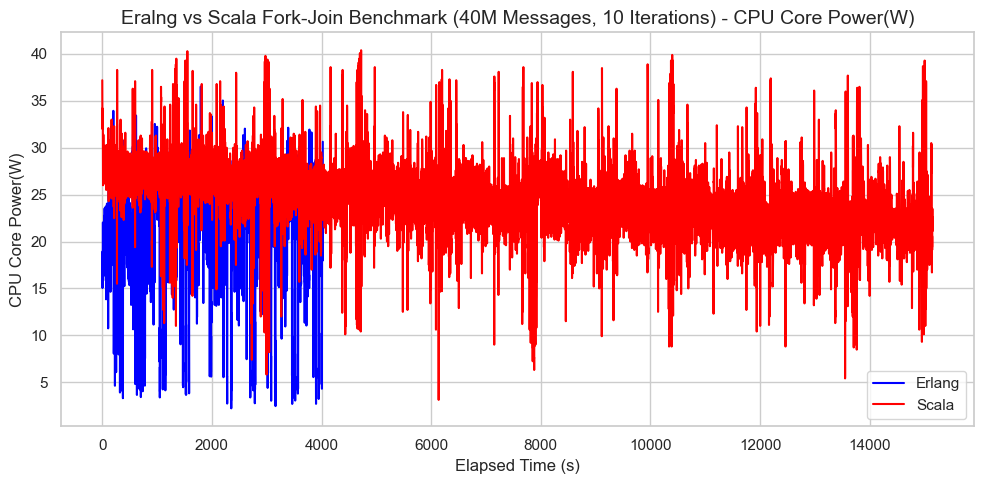

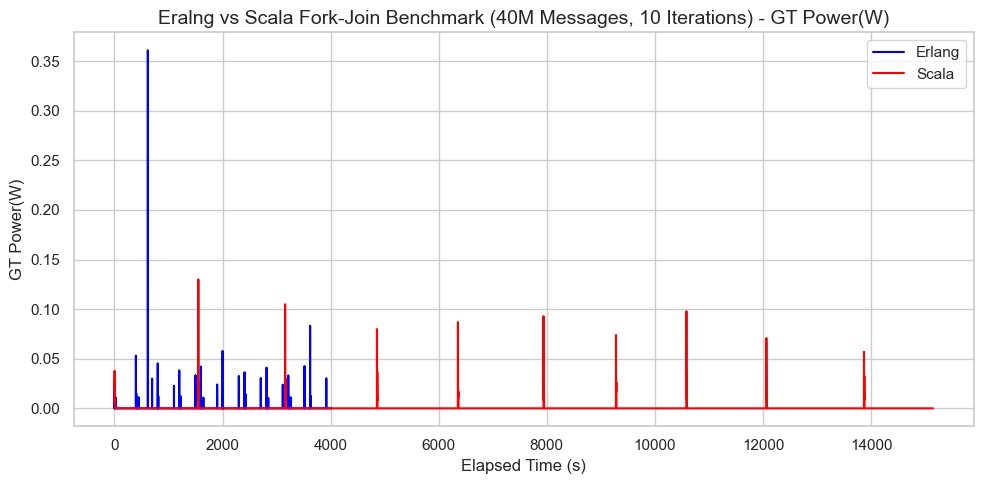

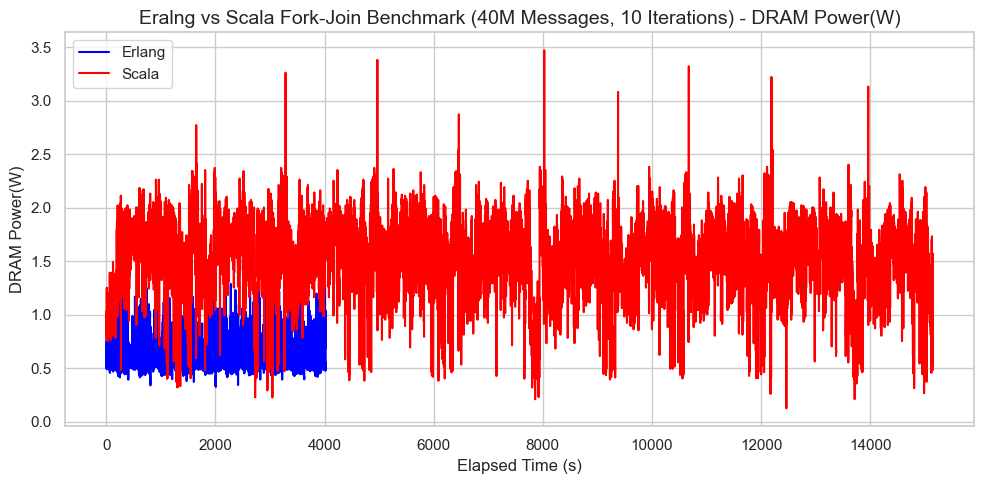

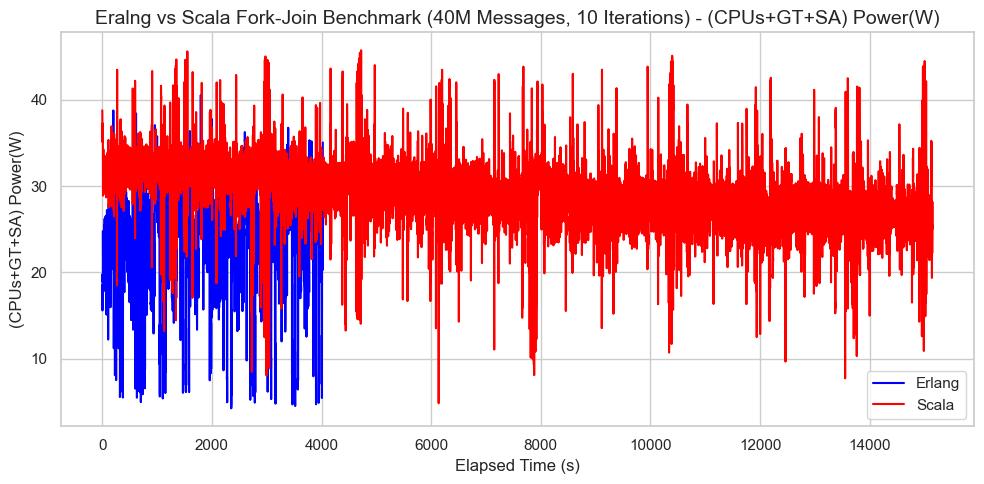

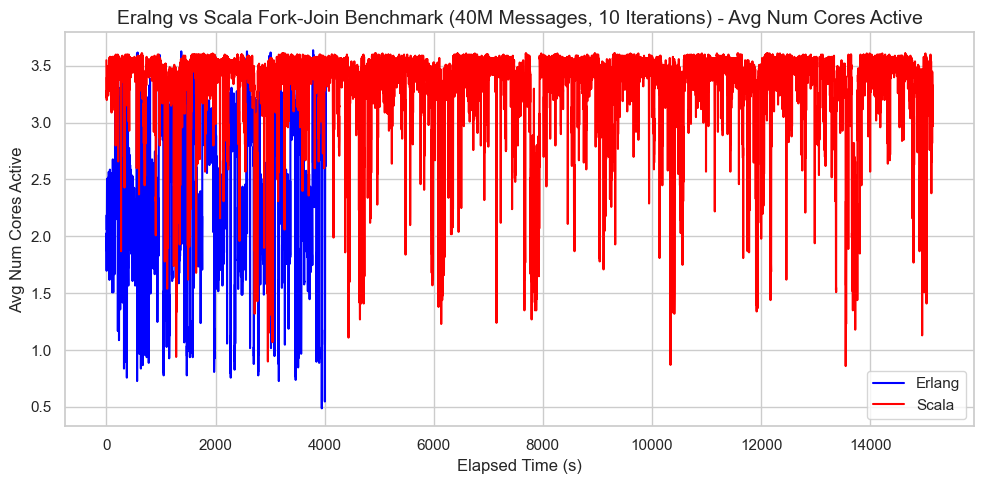

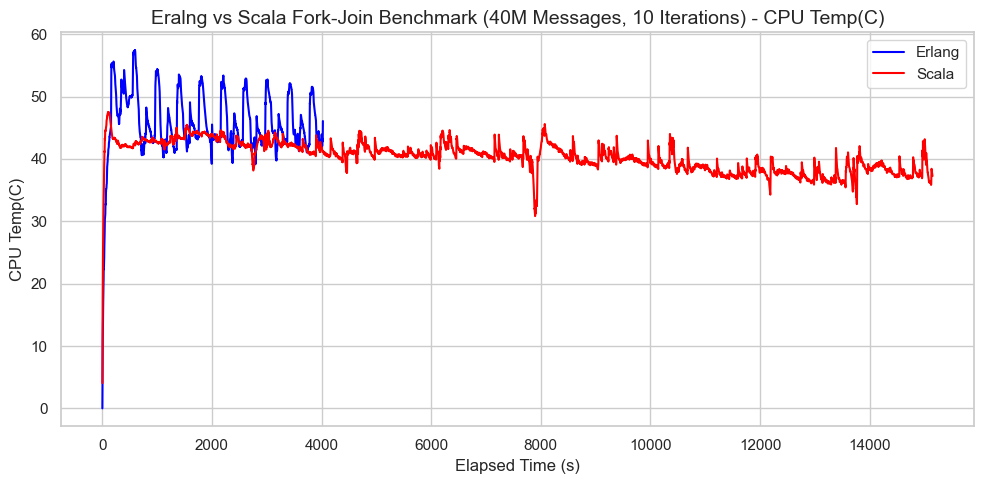

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Fork-Join Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        24.392024
GT Power(W)              -0.042559
DRAM Power(W)             1.510564
(CPUs+GT+SA) Power(W)    28.893298
CPU Temp(C)              40.382746
Avg Num Cores Active      3.322161
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        20.882329
GT Power(W)              -0.005448
DRAM Power(W)             0.656949
(CPUs+GT+SA) Power(W)    23.615329
CPU Temp(C)              45.742992
Avg Num Cores Active      2.514639
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")



Results appended to ../../data/fjcreate/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 392334.35289443564 Joules
Erlang Benchmark: 86682.13551442088 Joules
